#Inital Run

In [0]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
import gc
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import time
%matplotlib inline

pal = sns.color_palette()
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
# Any results you write to the current directory are saved as output.

#make wider graphs
sns.set(rc={'figure.figsize':(12,5)});
plt.figure(figsize=(12,5));

<Figure size 864x360 with 0 Axes>

In [0]:
#data = pd.read_csv('/content/drive/My Drive/Practicum Data Set/final_dataset.csv', index_col=0)
fullData = pd.read_csv('/content/drive/My Drive/Practicum Data Set/fullData.csv', index_col=0)
underSample = pd.read_csv('/content/drive/My Drive/Practicum Data Set/underSample.csv', index_col=0)
merge = pd.read_csv('/content/drive/My Drive/Practicum Data Set/merge.csv', index_col=0)


/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


## Initial Data Desc

In [0]:
pip install impyute

In [0]:
pip install fancyimpute 

In [0]:
pub1 = pd.read_csv('/content/drive/My Drive/Practicum Data Set/publishers_08mar12.csv')
pub2 = pd.read_csv('/content/drive/My Drive/Practicum Data Set/publishers_09feb12.csv')
pub3= pd.read_csv('/content/drive/My Drive/Practicum Data Set/publishers_23feb12.csv')

frames = [pub1,pub2,pub3]

pub = pd.concat(frames,sort=True)

click1 = pd.read_csv('/content/drive/My Drive/Practicum Data Set/clicks_08mar12.csv')
click2 = pd.read_csv('/content/drive/My Drive/Practicum Data Set/clicks_09feb12.csv')
click3 = pd.read_csv('/content/drive/My Drive/Practicum Data Set/clicks_23feb12.csv')

frames2 =[click1,click2,click3]

click = pd.concat(frames2,sort=True)

In [0]:
#pub1 = pd.read_csv('C:/Users/Gautam/Desktop/DCU/Practicum/Dataset/BuzzFeed Data/publishers_08mar12.csv')
#pub2 = pd.read_csv('C:/Users/Gautam/Desktop/DCU/Practicum/Dataset/BuzzFeed Data/publishers_09feb12.csv')
#pub3= pd.read_csv('C:/Users/Gautam/Desktop/DCU/Practicum/Dataset/BuzzFeed Data/publishers_23feb12.csv')

#frames = [pub1,pub2,pub3]

#pub = pd.concat(frames,sort=True)

#click1 = pd.read_csv('C:/Users/Gautam/Desktop/DCU/Practicum/Dataset/BuzzFeed Data/clicks_08mar12.csv')
#click2 = pd.read_csv('C:/Users/Gautam/Desktop/DCU/Practicum/Dataset/BuzzFeed Data/clicks_09feb12.csv')
#click3 = pd.read_csv('C:/Users/Gautam/Desktop/DCU/Practicum/Dataset/BuzzFeed Data/clicks_23feb12.csv')

#frames2 =[click1,click2,click3]

#click = pd.concat(frames2,sort=True)

In [0]:
data_test1 = pd.merge(click1, pub1, on='partnerid')
data_test2 = pd.merge(click2, pub2, on='partnerid')
data_test3 = pd.merge(click3, pub3, on='partnerid')

data_test1['status'] = data_test1['status'].replace('Observation_New','Observation')
data_test1 = data_test1[data_test1.status != 'Observation']
data_test1 = data_test1.drop(columns=['id','partnerid','cid','address','bankaccount'])

data_test2['status'] = data_test2['status'].replace('Observation_New','Observation')
data_test2 = data_test2[data_test2.status != 'Observation']
data_test2 = data_test2.drop(columns=['id','partnerid','cid','address','bankaccount'])

data_test3['status'] = data_test3['status'].replace('Observation_New','Observation')
data_test3 = data_test3[data_test3.status != 'Observation']
data_test3 = data_test3.drop(columns=['id','partnerid','cid','address','bankaccount'])

In [0]:
print(data_test1.groupby('status').count())
print(data_test1['status'].size)
print (data_test1.timeat.min())
print (data_test1.timeat.max())


print(data_test2.groupby('status').count())
print(data_test2['status'].size)
print (data_test2.timeat.min())
print (data_test2.timeat.max())


print(data_test3.groupby('status').count())
print(data_test3['status'].size)
print (data_test3.timeat.min())
print (data_test3.timeat.max())

         iplong    agent     cntr   timeat  category  referer
status                                                       
Fraud    134866   134816   134418   134866    134866   105288
OK      2177722  2175309  2175192  2177722   2177722  1216014
2312588
2012-03-08 00:00:00.0
2012-03-10 23:59:59.0
         iplong    agent     cntr   timeat  category  referer
status                                                       
Fraud    127010   125080   126753   127010    127010    92166
OK      2726705  2720493  2723930  2726705   2726705  1456213
2853715
2012-02-09 00:00:00.0
2012-02-11 23:59:59.0
         iplong    agent     cntr   timeat  category  referer
status                                                       
Fraud    155387   154988   154985   155387    155387   112700
OK      2145403  2143142  2142283  2145403   2145403  1221417
2300790
2012-02-23 00:00:00.0
2012-02-25 23:59:59.0


In [0]:
pub.head(5)

In [0]:
click.head(5)

In [0]:
data = pd.merge(click, pub, on='partnerid')

In [0]:
#data.to_csv('dataset.csv',index=False)

COLUMN Description :

partnerid - partnerid - Unique identifier of a publisher.

Bankaccount - Bank account associated with a publisher (may be empty)

address - Mailing address of a publisher (obfuscated; may be empty)

status - Label of a publisher, which can be the following:
"OK" - Publishers whom BuzzCity deems as having healthy traffic (or those who slipped their detection mechanisms)
"Observation" - Publishers who may have just started their traffic or their traffic statistics deviates from system wide average. BuzzCity does not have any conclusive stand with these publishers yet
"Fraud" - Publishers who are deemed as fraudulent with clear proof. Buzzcity suspends their accounts and their earnings will not be paid


agent - deviceua - Phone model used by a clicker/visitor

category - publisherchannel - Publisher's channel type, which can be the following:
ad - Adult sites
co - Community
es - Entertainment and lifestyle
gd - Glamour and dating
in - Information
mc - Mobile content
pp - Premium portal
se - Search, portal, services
mg - 
ow - 

cid - adscampaignid - Unique identifier of a given advertisement campaign

cntr - usercountry - Country from which the surfer is

id - id - Unique identifier of a particular click

iplong - numericip - Public IP address of a clicker/visitor

referer - referredurl - URL where the ad banners were clicked (obfuscated; may be empty). 

timeat - clicktime - Timestamp of a given click (in YYYY-MM-DD format)

partnerid - publisherid - Unique identifier of a publisher


In [0]:
data.head(5)

,Unnamed: 0,agent,category,cntr,iplong,referer,timeat,status
0,0,SonyEricsson_K70,ad,us,1071324855,NaN,2012-03-08 00:00:00.0,OK
1,1,Nokia_2730c,ad,au,1868310973,NaN,2012-03-08 00:00:02.0,OK
2,2,Nokia_2330c,ad,ke,3301565714,tbuyyyoychgjo1ndlucxgt9o6,2012-03-08 00:00:11.0,OK
3,3,SonyEricsson_W20,ad,iq,1605039771,thqfa0sa55mqsv58thp2f4mig,2012-03-08 00:00:15.0,OK
4,4,Samsung_GT-B3210,ad,za,3309442764,gbb407skm0shiglvo2tekqo7r,2012-03-08 00:00:16.0,OK


In [0]:
data['status'] = data['status'].replace('Observation_New','Observation')

In [0]:
data = data[data.status != 'Observation']

In [0]:
data.head(5)

,agent,category,cid,cntr,id,iplong,partnerid,referer,timeat,address,bankaccount,status
0,SonyEricsson_K70,ad,dsfag,us,9794476,1071324855,dv3va,NaN,2012-03-08 00:00:00.0,g9rffau0b792mpai1m3gj20a3,NaN,OK
1,Nokia_2730c,ad,drvnr,au,9794499,1868310973,dv3va,NaN,2012-03-08 00:00:02.0,g9rffau0b792mpai1m3gj20a3,NaN,OK
2,Nokia_2330c,ad,dvfqu,ke,9794726,3301565714,dv3va,tbuyyyoychgjo1ndlucxgt9o6,2012-03-08 00:00:11.0,g9rffau0b792mpai1m3gj20a3,NaN,OK
3,SonyEricsson_W20,ad,dsftc,iq,9794828,1605039771,dv3va,thqfa0sa55mqsv58thp2f4mig,2012-03-08 00:00:15.0,g9rffau0b792mpai1m3gj20a3,NaN,OK
4,Samsung_GT-B3210,ad,du4v5,za,9794839,3309442764,dv3va,gbb407skm0shiglvo2tekqo7r,2012-03-08 00:00:16.0,g9rffau0b792mpai1m3gj20a3,NaN,OK


In [0]:
data = data.drop(columns=['id','partnerid','cid','address','bankaccount'])

In [0]:
!pwd

/content


In [0]:
#data.to_csv(path_or_buf ='/content/drive/My Drive/Practicum Data Set/final_dataset.csv',sep=',', header=True)

## Visualisations

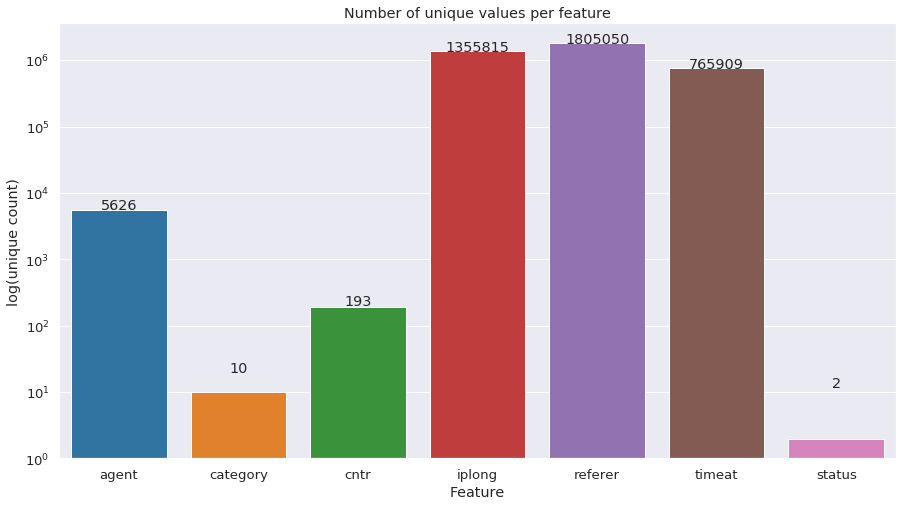

In [0]:
plt.figure(figsize=(15, 8))
cols = data.columns
uniques = [len(fullData[col].unique()) for col in cols]
sns.set(font_scale=1.2)
ax = sns.barplot(cols, uniques, palette=pal, log=True)
ax.set(xlabel='Feature', ylabel='log(unique count)', title='Number of unique values per feature')
for p, uniq in zip(ax.patches, uniques):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 10,
            uniq,
            ha="center") 

In [0]:
print(data['category'].value_counts())


In [0]:
print(data['cntr'].value_counts())


In [0]:
print(data['agent'].value_counts())


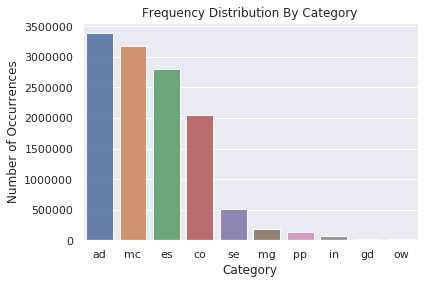

In [0]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
carrier_count = data['category'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution By Category')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.show()

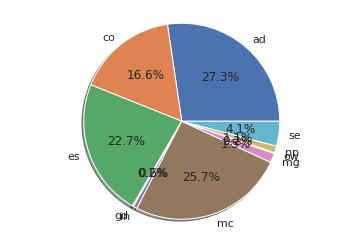

In [0]:
labels = data['category'].astype('category').cat.categories.tolist()
counts = data['category'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [0]:
data.count()

Unnamed: 0    12387540
agent         12364814
category      12387540
cntr          12371637
iplong        12387540
referer        6959884
timeat        12387540
status        12387540
dtype: int64

In [0]:
data.isnull().sum()


Unnamed: 0          0
agent           22726
category            0
cntr            15903
iplong              0
referer       5427656
timeat              0
status              0
dtype: int64

In [0]:
fullData = data.dropna()

In [0]:
fullData.columns

Index(['agent', 'category', 'cntr', 'iplong', 'referer', 'timeat', 'status'], dtype='object')

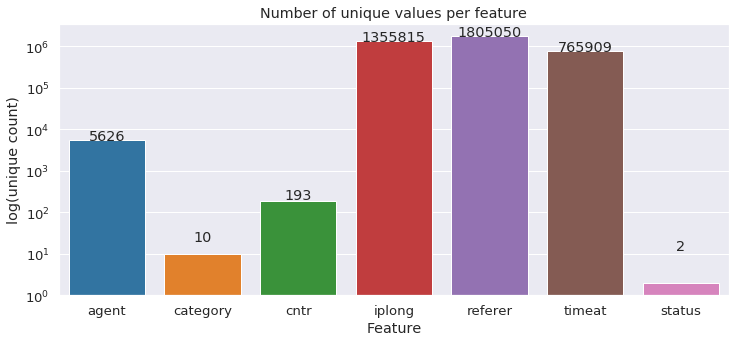

In [0]:

cols = fullData.columns
uniques = [len(fullData[col].unique()) for col in cols]
sns.set(font_scale=1.2)
ax = sns.barplot(cols, uniques, palette=pal, log=True)
ax.set(xlabel='Feature', ylabel='log(unique count)', title='Number of unique values per feature')
for p, uniq in zip(ax.patches, uniques):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 10,
            uniq,
            ha="center") 

In [0]:
fullData.count()

agent       6938523
category    6938523
cntr        6938523
iplong      6938523
referer     6938523
timeat      6938523
status      6938523
dtype: int64

In [0]:
print(fullData['status'].value_counts())

OK       6494084
Fraud     444439
Name: status, dtype: int64


In [0]:
fullData.isnull().sum()

agent       0
category    0
cntr        0
iplong      0
referer     0
timeat      0
status      0
dtype: int64

In [0]:
fullData['iplong'] = fullData['iplong'].astype('category')

In [0]:
#fullData.to_csv(path_or_buf ='/content/drive/My Drive/Practicum Data Set/fullData.csv',sep=',', header=True)

In [0]:
fullData.dtypes

agent         object
category      object
cntr          object
iplong      category
referer       object
timeat        object
status        object
dtype: object

In [0]:
no_frauds = len(fullData[fullData['status'] == 'Fraud'])
no_frauds
non_fraud_indices = fullData[fullData.status == 'OK'].index
random_indices = np.random.choice(non_fraud_indices,no_frauds, replace=False)
fraud_indices = fullData[fullData.status == 'Fraud'].index
under_sample_indices = np.concatenate([fraud_indices,random_indices])
underSample = fullData.loc[under_sample_indices]
#underSample.to_csv(path_or_buf ='/content/drive/My Drive/Practicum Data Set/underSample.csv',sep=',', header=True)

In [0]:
print(underSample['status'].value_counts())


Fraud    444439
OK       444439
Name: status, dtype: int64


In [0]:
underSample.columns

Index(['agent', 'category', 'cntr', 'iplong', 'referer', 'timeat', 'status'], dtype='object')

In [0]:
underSample['iplong'] = underSample['iplong'].astype('category')

In [0]:
underSample.dtypes

agent                 object
category              object
cntr                  object
iplong                 int64
referer               object
timeat                object
status                object
status_binary          int64
datetime              object
click_day              int64
click_hour             int64
click_min              int64
click_sec              int64
click_month            int64
clicks_by_ip           int64
clicks_by_cntr         int64
clicks_by_referer      int64
clicks_by_category     int64
clicks_per_minute      int64
clicks_per_hour        int64
ip_ref_cat_per_min     int64
ip_ref_cat_per_hr      int64
ip_cat_per_min         int64
ip_cat_per_hr          int64
ip_min_count           int64
ip_min_avg             int64
ip_ref_cat_min_avg     int64
ip_cat_min_avg         int64
dtype: object

# Categorical Base Model

In [0]:
pip install catboost


First Base Model - CATBOOST

In [0]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
x = fullData.drop(columns=['status','referer'])
y = fullData['status'].copy()
y_mod = y.apply(lambda x: 0 if x == 'OK' else 1)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y_mod, random_state=13)

In [0]:
x.columns

Index(['agent', 'category', 'cntr', 'iplong', 'timeat'], dtype='object')

In [0]:
y = y.to_frame()

In [0]:
y.columns

Index(['status'], dtype='object')

In [0]:
model_dataset = pd.concat([x_train, y_train], axis=1)

In [0]:
print(model_dataset['status'].value_counts())


0    4870223
1     333669
Name: status, dtype: int64


In [0]:
no_frauds = len(model_dataset[model_dataset['status'] == 1])
non_fraud_indices = model_dataset[model_dataset.status == 0].index
random_indices = np.random.choice(non_fraud_indices,no_frauds, replace=False)
fraud_indices = model_dataset[model_dataset.status == 1].index
under_sample_indices = np.concatenate([fraud_indices,random_indices])
underSample = model_dataset.loc[under_sample_indices]
#underSample.to_csv(path_or_buf ='/content/drive/My Drive/Practicum Data Set/underSample.csv',sep=',', header=True)

In [0]:
print(underSample['status'].value_counts())

1    333669
0    333669
Name: status, dtype: int64


In [0]:
y_train = underSample.status
x_train = underSample.drop(['status'], axis=1)

In [0]:
model=CatBoostClassifier(random_state=13)
model.fit(x_train, y_train, cat_features=x_train.columns)

In [0]:
imp_features=model.feature_importances_
print(x.columns)
print(imp_features)

Index(['agent', 'category', 'cntr', 'iplong', 'timeat'], dtype='object')
[18.32554066 21.28493275 23.7379285  28.93419621  7.71740188]


In [0]:
from sklearn import metrics 
y_pred=model.predict(x_test)

In [0]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9503779189925696


In [0]:
from sklearn.metrics import roc_auc_score

# Calculate roc auc
roc_value = roc_auc_score(y_test, y_pred)
roc_value

0.9184027686205548

In [0]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.99      0.96      0.97   1623861
           1       0.57      0.88      0.69    110770

    accuracy                           0.95   1734631
   macro avg       0.78      0.92      0.83   1734631
weighted avg       0.96      0.95      0.96   1734631



array([[1550884,   72977],
       [  13099,   97671]])

In [0]:
feature_imp = pd.Series(model.feature_importances_,index=x.columns).sort_values(ascending=False)
feature_imp

referer     53.974273
iplong      18.383014
cntr        12.746775
category     8.289294
agent        6.308885
timeat       0.297759
dtype: float64

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [0]:
x.dtypes

agent         object
category      object
cntr          object
iplong      category
referer       object
timeat        object
dtype: object

## TP

In [0]:
from imblearn.over_sampling import SMOTENC
sm = SMOTENC(categorical_features=x.columns,random_state=0)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)

In [0]:
cols_to_check = ['agent', 'cntr','referer']
data['is_na'] = data[cols_to_check].isnull().apply(lambda x: all(x), axis=1) 
data.head()  
print(data['is_na'].value_counts())

False    12387537
True            3
Name: is_na, dtype: int64


In [0]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12387540 entries, 0 to 14070352
Data columns (total 7 columns):
agent       object
category    object
cntr        object
iplong      int64
referer     object
timeat      object
status      object
dtypes: int64(1), object(6)
memory usage: 756.1+ MB
None


In [0]:
cols = data.copy()

Handle Missing Values for agent, country, referer 

Not using address & bank account thus ignored

In [0]:
cols = cols.fillna(method = 'bfill')


In [0]:
cols.isnull().sum()


agent         22726
category          0
cntr          15903
iplong            0
referer     5427656
timeat            0
status            0
dtype: int64

In [0]:
temp = KNN(k=5).complete(cols)

AttributeError: ignored

In [0]:
cols = cols.drop(["status"])

In [0]:
from fancyimpute import  KNN
train_columns = list(cols)
train = KNN(cols,3)
train.columns = train_columns
#train.material = train.material.astype("object")
train = pd.get_dummies(train)

In [0]:
train

,"KNN(fill_method='zero', max_value=None, min_value=None, normalizer=None, orientation=3, print_interval=100, verbose=True)"
0,1


In [0]:
#We use the train dataframe from Titanic dataset
#fancy impute removes column names.
train_cols = list(cols)
# Use 5 nearest rows which have a feature to fill in each row's
# missing features
train = KNN(cols,5)
train.columns = train_cols



array(['agent', 'category', 'cntr', 'iplong', 'referer', 'timeat'],
      dtype=object)

# FEATURE EXTRACTION:

## Feature Extraction

In [0]:
#make wider graphs
sns.set(rc={'figure.figsize':(12,5)});
plt.figure(figsize=(12,5));

<Figure size 864x360 with 0 Axes>

In [0]:
fullData.head(5)

,agent,category,cntr,iplong,referer,timeat,status,status_binary,datetime,click_day,click_hour,click_min,click_sec,click_month
0,Nokia_2330c,ad,ke,3301565714,tbuyyyoychgjo1ndlucxgt9o6,2012-03-08 00:00:11.0,OK,0,2012-03-08 00:00:11,8,0,0,11,3
1,SonyEricsson_W20,ad,iq,1605039771,thqfa0sa55mqsv58thp2f4mig,2012-03-08 00:00:15.0,OK,0,2012-03-08 00:00:15,8,0,0,15,3
2,Samsung_GT-B3210,ad,za,3309442764,gbb407skm0shiglvo2tekqo7r,2012-03-08 00:00:16.0,OK,0,2012-03-08 00:00:16,8,0,0,16,3
3,Nokia_500,ad,bn,3399005716,qcfc7pdq80q9jqdjn9t4iqra6,2012-03-08 00:00:38.0,OK,0,2012-03-08 00:00:38,8,0,0,38,3
4,Apple_iPhone,ad,iq,1605039771,rveydov63ccean9pf80l1dk9l,2012-03-08 00:00:42.0,OK,0,2012-03-08 00:00:42,8,0,0,42,3


In [0]:
fullData.columns

Index(['agent', 'category', 'cntr', 'iplong', 'referer', 'timeat', 'status',
       'status_binary', 'datetime', 'click_month', 'click_day', 'click_hour',
       'click_min', 'click_sec'],
      dtype='object')

In [0]:
fullData.dtypes

agent         object
category      object
cntr          object
iplong      category
referer       object
timeat        object
status        object
dtype: object

In [0]:
fullData['status_binary'] = fullData['status'] .apply(lambda x: 0 if x == 'OK' else 1)

In [0]:
fullData['datetime'] = pd.to_datetime(fullData['timeat'])


In [0]:
fullData['click_month']=fullData['datetime'].dt.month
fullData['click_day']=fullData['datetime'].dt.day
fullData['click_hour']=fullData['datetime'].dt.hour
fullData['click_min']=fullData['datetime'].dt.minute
fullData['click_sec']=fullData['datetime'].dt.second


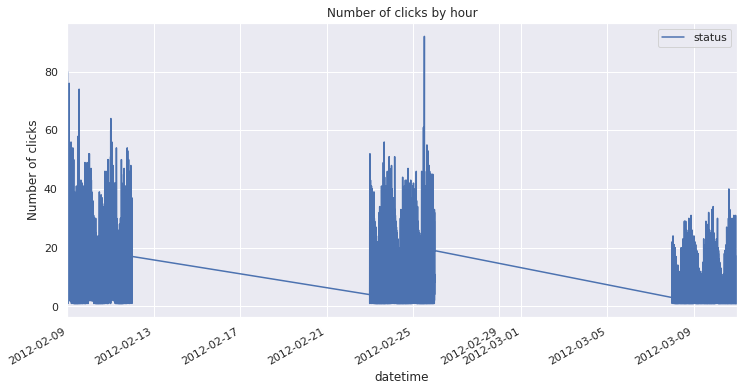

In [0]:
fullData.groupby('datetime').agg({'status':'count'}).plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('Number of clicks by hour');

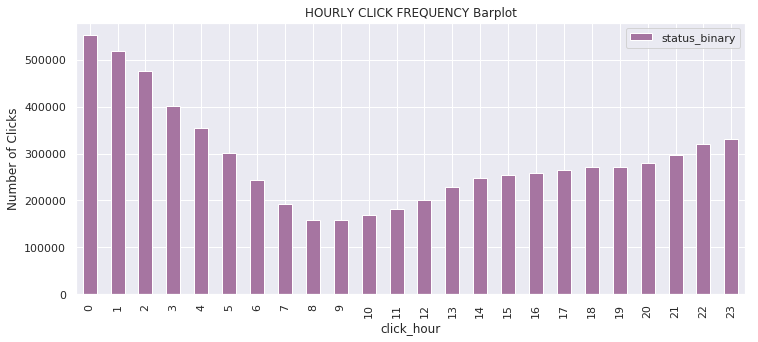

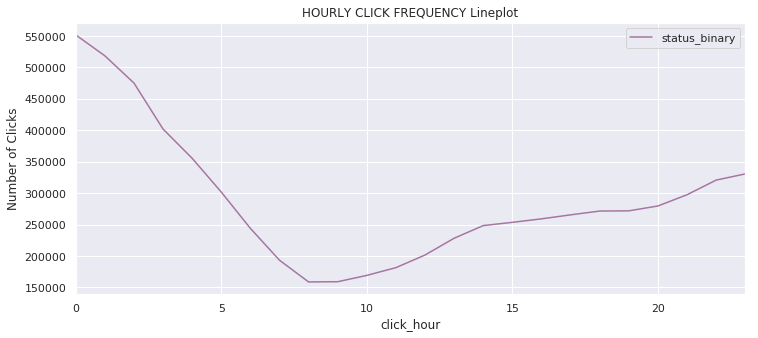

In [0]:
fullData[['click_hour','status_binary']].groupby(['click_hour'], as_index=True).count().plot(kind='bar', color='#a675a1')
plt.title('HOURLY CLICK FREQUENCY Barplot');
plt.ylabel('Number of Clicks');

fullData[['click_hour','status_binary']].groupby(['click_hour'], as_index=True).count().plot(color='#a675a1')
plt.title('HOURLY CLICK FREQUENCY Lineplot');
plt.ylabel('Number of Clicks');

In [0]:
fraudData = fullData[fullData['status_binary'] == 1]

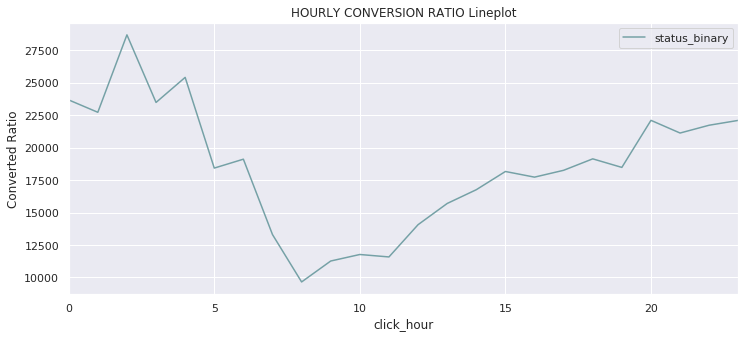

In [0]:
fraudData[['click_hour','status_binary']].groupby(['click_hour'], as_index=True).count().plot( color='#75a1a6')
plt.title('HOURLY CONVERSION RATIO Lineplot');
plt.ylabel('Converted Ratio');

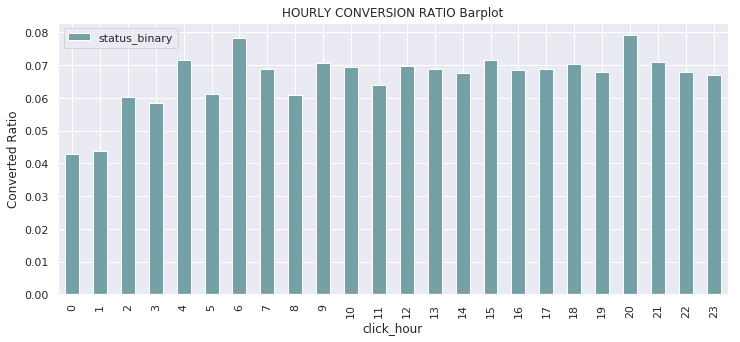

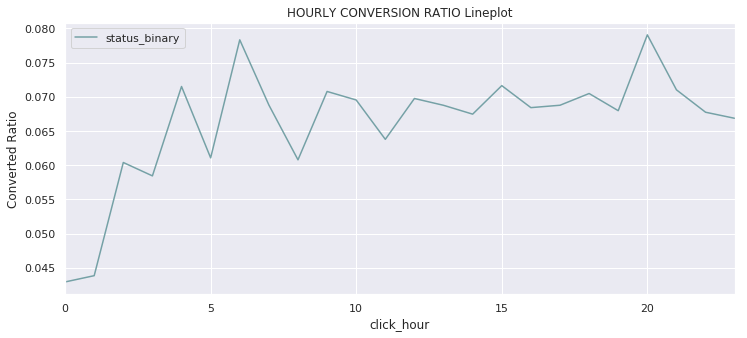

In [0]:
fullData[['click_hour','status_binary']].groupby(['click_hour'], as_index=True).mean().plot(kind='bar', color='#75a1a6')
plt.title('HOURLY CONVERSION RATIO Barplot');
plt.ylabel('Converted Ratio');

fullData[['click_hour','status_binary']].groupby(['click_hour'], as_index=True).mean().plot( color='#75a1a6')
plt.title('HOURLY CONVERSION RATIO Lineplot');
plt.ylabel('Converted Ratio');

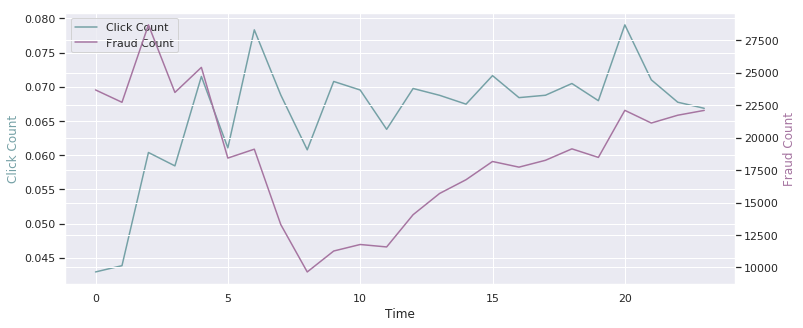

In [0]:
group = fullData[['click_hour','status_binary']].groupby(['click_hour'], as_index=False).mean()
x = group['click_hour']
ymean = group['status_binary']
group = fraudData[['click_hour','status_binary']].groupby(['click_hour'], as_index=False).count()
ycount = group['status_binary']


fig = plt.figure()
host = fig.add_subplot(111)

par1 = host.twinx()

host.set_xlabel("Time")
host.set_ylabel("Click Count")
par1.set_ylabel("Fraud Count")

#host.set_ylim([0,  600000])
#par1.set_ylim([0,  60000])

#color1 = plt.cm.viridis(0)
#color2 = plt.cm.viridis(0.5)
color1 = '#75a1a6'
color2 = '#a675a1'

p1, = host.plot(x, ymean, color=color1,label="Click Count")
p2, = par1.plot(x, ycount, color=color2, label="Fraud Count")

lns = [p1, p2]
host.legend(handles=lns, loc='best')

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())

plt.savefig("pyplot_multiple_y-axis.png", bbox_inches='tight')

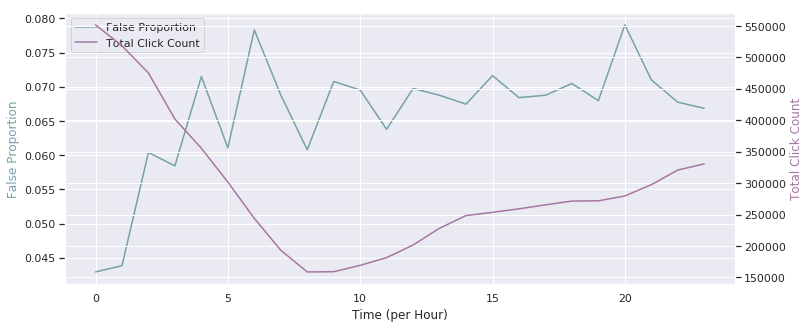

In [0]:
group = fullData[['click_hour','status_binary']].groupby(['click_hour'], as_index=False).mean()
x = group['click_hour']
ymean = group['status_binary']
group = fullData[['click_hour','status_binary']].groupby(['click_hour'], as_index=False).count()
ycount = group['status_binary']


fig = plt.figure()
host = fig.add_subplot(111)

par1 = host.twinx()

host.set_xlabel("Time (per Hour)")
host.set_ylabel("False Proportion")
par1.set_ylabel("Total Click Count")

#color1 = plt.cm.viridis(0)
#color2 = plt.cm.viridis(0.5)
color1 = '#75a1a6'
color2 = '#a675a1'

p1, = host.plot(x, ymean, color=color1,label="False Proportion")
p2, = par1.plot(x, ycount, color=color2, label="Total Click Count")

lns = [p1, p2]
host.legend(handles=lns, loc='best')

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())

plt.savefig("pyplot_multiple_y-axis.png", bbox_inches='tight')

In [0]:
Index(['agent', 'category', 'cntr', 'iplong', 'referer', 'timeat', 'status',
       'status_binary', 'datetime', 'click_day', 'click_hour', 'click_min',
       'click_sec'],
      dtype='object')

In [0]:
merge.columns

Index(['agent', 'category', 'cntr', 'iplong', 'referer', 'timeat', 'status',
       'status_binary', 'datetime', 'click_day', 'click_hour', 'click_min',
       'click_sec', 'click_month', 'clicks_by_ip', 'clicks_by_cntr',
       'clicks_by_referer', 'clicks_by_category', 'clicks_per_minute',
       'clicks_per_hour', 'ip_ref_cat_per_min', 'ip_ref_cat_per_hr',
       'ip_cat_per_min', 'ip_cat_per_hr', 'ip_min_count', 'ip_min_avg',
       'ip_ref_cat_min_avg', 'ip_cat_min_avg'],
      dtype='object')

## COUNT FEATURES

In [0]:
# Count the number of clicks by ip
ip_count = fullData.groupby(['iplong'])['timeat'].count().reset_index()
ip_count.columns = ['iplong', 'clicks_by_ip']
merge= pd.merge(fullData, ip_count, on='iplong', how='left', sort=False)
merge['clicks_by_ip'] = merge['clicks_by_ip'].astype('uint16')
#merge.drop('ip', axis=1, inplace=True)

In [0]:
# Count the number of clicks by country
cntr_count = fullData.groupby(['cntr'])['timeat'].count().reset_index()
cntr_count.columns = ['cntr', 'clicks_by_cntr']
merge = pd.merge(merge, cntr_count, on='cntr', how='left', sort=False)
merge['clicks_by_cntr'] = merge['clicks_by_cntr'].astype('uint16')
#merge.drop('ip', axis=1, inplace=True)

In [0]:
# Count the number of clicks by referer
referer_count = fullData.groupby(['referer'])['timeat'].count().reset_index()
referer_count.columns = ['referer', 'clicks_by_referer']
merge = pd.merge(merge, referer_count, on='referer', how='left', sort=False)
merge['clicks_by_referer'] = merge['clicks_by_referer'].astype('uint16')
#merge.drop('ip', axis=1, inplace=True)

In [0]:
# Count the number of clicks by category
category_count = fullData.groupby(['category'])['timeat'].count().reset_index()
category_count.columns = ['category', 'clicks_by_category']
merge = pd.merge(merge, category_count, on='category', how='left', sort=False)
merge['clicks_by_category'] = merge['clicks_by_category'].astype('uint16')
#merge.drop('ip', axis=1, inplace=True)

In [0]:
# Count the number of clicks per minute
minute_count = fullData.groupby(['click_month','click_day','click_hour','click_min'])['timeat'].count().reset_index()
minute_count.columns = ['click_month','click_day','click_hour','click_min', 'clicks_per_minute']
merge = pd.merge(merge, minute_count, on=['click_month','click_day','click_hour','click_min'], how='left', sort=False)
merge['clicks_per_minute'] = merge['clicks_per_minute'].astype('uint16')
#merge.drop('ip', axis=1, inplace=True)

In [0]:
# Count the number of clicks per hour
hour_count = fullData.groupby(['click_month','click_day','click_hour'])['timeat'].count().reset_index()
hour_count.columns = ['click_month','click_day','click_hour', 'clicks_per_hour']
merge = pd.merge(merge, hour_count, on=['click_month','click_day','click_hour'], how='left', sort=False)
merge['clicks_per_hour'] = merge['clicks_per_hour'].astype('uint16')
#merge.drop('ip', axis=1, inplace=True)

In [0]:
# Count the number of clicks per ip, referrer, category per min
ip_ref_cat_min_count = fullData.groupby(['iplong','referer','category','click_month','click_day','click_hour','click_min'])['timeat'].count().reset_index()
ip_ref_cat_min_count.columns = ['iplong','referer','category','click_month','click_day','click_hour','click_min', 'ip_ref_cat_per_min']
merge = pd.merge(merge, ip_ref_cat_min_count, on=['iplong','referer','category','click_month','click_day','click_hour','click_min'], how='left', sort=False)
merge['ip_ref_cat_per_min'] = merge['ip_ref_cat_per_min'].astype('uint16')
#merge.drop('ip', axis=1, inplace=True)

In [0]:
# Count the number of clicks per ip, referrer, category per hr
ip_ref_cat_hr_count = fullData.groupby(['iplong','referer','category','click_month','click_day','click_hour'])['timeat'].count().reset_index()
ip_ref_cat_hr_count.columns = ['iplong','referer','category','click_month','click_day','click_hour', 'ip_ref_cat_per_hr']
merge = pd.merge(merge, ip_ref_cat_hr_count, on=['iplong','referer','category','click_month','click_day','click_hour'], how='left', sort=False)
merge['ip_ref_cat_per_hr'] = merge['ip_ref_cat_per_hr'].astype('uint16')
#merge.drop('ip', axis=1, inplace=True)

In [0]:
# Count the number of clicks per ip, category per min
ip_cat_min_count = fullData.groupby(['iplong','category','click_month','click_day','click_hour','click_min'])['timeat'].count().reset_index()
ip_cat_min_count.columns = ['iplong','category','click_month','click_day','click_hour','click_min', 'ip_cat_per_min']
merge = pd.merge(merge, ip_cat_min_count, on=['iplong','category','click_month','click_day','click_hour','click_min'], how='left', sort=False)
merge['ip_cat_per_min'] = merge['ip_cat_per_min'].astype('uint16')
#merge.drop('ip', axis=1, inplace=True)

In [0]:
# Count the number of clicks per ip, category per hr
ip_cat_hr_count = fullData.groupby(['iplong','category','click_month','click_day','click_hour'])['timeat'].count().reset_index()
ip_cat_hr_count.columns = ['iplong','category','click_month','click_day','click_hour', 'ip_cat_per_hr']
merge = pd.merge(merge, ip_cat_hr_count, on=['iplong','category','click_month','click_day','click_hour'], how='left', sort=False)
merge['ip_cat_per_hr'] = merge['ip_cat_per_hr'].astype('uint16')
#merge.drop('ip', axis=1, inplace=True)

In [0]:
# Count the number of clicks by agent
agent_count = fullData.groupby(['agent'])['timeat'].count().reset_index()
agent_count.columns = ['agent', 'clicks_by_agent']
merge= pd.merge(merge, agent_count, on='agent', how='left', sort=False)
merge['clicks_by_agent'] = merge['clicks_by_agent'].astype('uint16')
#merge.drop('ip', axis=1, inplace=True)

In [0]:
# Count the number of clicks by agent,ip
agent_ip_count = fullData.groupby(['agent','iplong'])['timeat'].count().reset_index()
agent_ip_count.columns = ['agent','iplong','agent_ip_count']
merge= pd.merge(merge, agent_ip_count, on=['agent','iplong'], how='left', sort=False)
merge['agent_ip_count'] = merge['agent_ip_count'].astype('uint16')
#merge.drop('ip', axis=1, inplace=True)

In [0]:
# Count the number of clicks by agent,cntr
agent_cntr_count = fullData.groupby(['agent','cntr'])['timeat'].count().reset_index()
agent_cntr_count.columns = ['agent','cntr','agent_cntr_count']
merge= pd.merge(merge, agent_cntr_count, on=['agent','cntr'], how='left', sort=False)
merge['agent_cntr_count'] = merge['agent_cntr_count'].astype('uint16')
#merge.drop('ip', axis=1, inplace=True)

AVERAGE FEATURES

In [0]:
# Average number of clicks per ip per min
ip_min_count = merge.groupby(['iplong','click_month','click_day','click_hour','click_min'])['timeat'].count().reset_index()
ip_min_count.columns = ['iplong','click_month','click_day','click_hour','click_min', 'ip_min_count']
merge = pd.merge(merge, ip_min_count, on=['iplong','click_month','click_day','click_hour','click_min'], how='left', sort=False)
merge['ip_min_count'] = merge['ip_min_count'].astype('uint16')
#merge.drop('ip', axis=1, inplace=True)


In [0]:
# Average number of clicks per ip per min
ip_min_avg = merge.groupby(['iplong'])['ip_min_count'].mean().reset_index()
ip_min_avg.columns = ['iplong', 'ip_min_avg']
merge = pd.merge(merge, ip_min_avg, on=['iplong'], how='left', sort=False)
merge['ip_min_avg'] = merge['ip_min_avg'].astype('uint16')
#merge.drop('ip', axis=1, inplace=True)


In [0]:
# Average number of clicks per ip, referrer, category per min
ip_ref_cat_min_avg = merge.groupby(['iplong','referer','category','click_month','click_day','click_hour','click_min'])['ip_ref_cat_per_min'].mean().reset_index()
ip_ref_cat_min_avg.columns = ['iplong','referer','category','click_month','click_day','click_hour','click_min', 'ip_ref_cat_min_avg']
merge = pd.merge(merge, ip_ref_cat_min_avg, on=['iplong','referer','category','click_month','click_day','click_hour','click_min'], how='left', sort=False)
merge['ip_ref_cat_min_avg'] = merge['ip_ref_cat_min_avg'].astype('uint16')
#merge.drop('ip', axis=1, inplace=True)


In [0]:
# Average number of clicks per ip, category per min
ip_cat_min_avg = merge.groupby(['iplong','category','click_month','click_day','click_hour','click_min'])['ip_cat_per_min'].mean().reset_index()
ip_cat_min_avg.columns = ['iplong','category','click_month','click_day','click_hour','click_min', 'ip_cat_min_avg']
merge = pd.merge(merge, ip_cat_min_avg, on=['iplong','category','click_month','click_day','click_hour','click_min'], how='left', sort=False)
merge['ip_cat_min_avg'] = merge['ip_cat_min_avg'].astype('uint16')
#merge.drop('ip', axis=1, inplace=True)

In [0]:
merge.head(5)

,agent,category,cntr,iplong,referer,timeat,status,status_binary,datetime,click_month,click_day,click_hour,click_min,click_sec,clicks_by_ip,clicks_by_cntr,clicks_by_referer,clicks_by_category,clicks_per_minute,clicks_per_hour,ip_ref_cat_per_min,ip_ref_cat_per_hr,ip_cat_per_min,ip_cat_per_hr,ip_min_count,ip_min_avg,ip_ref_cat_min_avg,ip_cat_min_avg,clicks_by_agent,agent_ip_count,agent_cntr_count
0,Nokia_2330c,ad,ke,3301565714,tbuyyyoychgjo1ndlucxgt9o6,2012-03-08 00:00:11.0,OK,0,2012-03-08 00:00:11,3,8,0,0,11,1175,45122,720,27081,345,34951,1,1,1,4,1,1,1,1,50130,143,6808
1,SonyEricsson_W20,ad,iq,1605039771,thqfa0sa55mqsv58thp2f4mig,2012-03-08 00:00:15.0,OK,0,2012-03-08 00:00:15,3,8,0,0,15,1625,11748,3,27081,345,34951,1,1,3,20,4,1,1,3,37287,4,7
2,Samsung_GT-B3210,ad,za,3309442764,gbb407skm0shiglvo2tekqo7r,2012-03-08 00:00:16.0,OK,0,2012-03-08 00:00:16,3,8,0,0,16,1,34095,1,27081,345,34951,1,1,1,1,1,1,1,1,11149,1,1207
3,Nokia_500,ad,bn,3399005716,qcfc7pdq80q9jqdjn9t4iqra6,2012-03-08 00:00:38.0,OK,0,2012-03-08 00:00:38,3,8,0,0,38,629,36691,1,27081,345,34951,1,1,1,9,1,1,1,1,24841,9,287
4,Apple_iPhone,ad,iq,1605039771,rveydov63ccean9pf80l1dk9l,2012-03-08 00:00:42.0,OK,0,2012-03-08 00:00:42,3,8,0,0,42,1625,11748,459,27081,345,34951,1,3,3,20,4,1,1,3,40530,18,129


In [0]:
merge.columns

Index(['agent', 'category', 'cntr', 'iplong', 'referer', 'timeat', 'status',
       'status_binary', 'datetime', 'click_month', 'click_day', 'click_hour',
       'click_min', 'click_sec', 'clicks_by_ip', 'clicks_by_cntr',
       'clicks_by_referer', 'clicks_by_category', 'clicks_per_minute',
       'clicks_per_hour', 'ip_ref_cat_per_min', 'ip_ref_cat_per_hr',
       'ip_cat_per_min', 'ip_cat_per_hr', 'ip_min_count', 'ip_min_avg',
       'ip_ref_cat_min_avg', 'ip_cat_min_avg', 'clicks_by_agent',
       'agent_ip_count', 'agent_cntr_count'],
      dtype='object')

In [0]:
merge = merge.drop(["ip_min_count_x","ip_min_count_y"],axis=1)

In [0]:
merge.to_csv(path_or_buf ='/content/drive/My Drive/Practicum Data Set/merge.csv',sep=',', header=True)

## Modelling

In [0]:
model_dataset = merge.copy()

In [93]:
print(model_dataset['status'].value_counts())


OK       6494084
Fraud     444439
Name: status, dtype: int64


In [94]:
model_dataset.columns

Index(['agent', 'category', 'cntr', 'iplong', 'referer', 'timeat', 'status',
       'status_binary', 'datetime', 'click_month', 'click_day', 'click_hour',
       'click_min', 'click_sec', 'clicks_by_ip', 'clicks_by_cntr',
       'clicks_by_referer', 'clicks_by_category', 'clicks_per_minute',
       'clicks_per_hour', 'ip_ref_cat_per_min', 'ip_ref_cat_per_hr',
       'ip_cat_per_min', 'ip_cat_per_hr', 'ip_min_count', 'ip_min_avg',
       'ip_ref_cat_min_avg', 'ip_cat_min_avg', 'clicks_by_agent',
       'agent_ip_count', 'agent_cntr_count'],
      dtype='object')

# MODEL 1:

## Under Sampling &Final Test & Train Split

In [0]:
from sklearn.model_selection import train_test_split
x = model_dataset.drop(columns=['agent','category', 'cntr', 'iplong', 'referer','timeat','status','status_binary','datetime','click_day', 'click_hour', 'click_min',
       'click_sec', 'click_month'])
y = model_dataset['status'].copy()
y_mod = y.apply(lambda x: 0 if x == 'OK' else 1)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y_mod, random_state=13)

In [0]:
model_dataset = pd.concat([x_train, y_train], axis=1)


In [119]:
model_dataset.head()

,clicks_by_ip,clicks_by_cntr,clicks_by_referer,clicks_by_category,clicks_per_minute,clicks_per_hour,ip_ref_cat_per_min,ip_ref_cat_per_hr,ip_cat_per_min,ip_cat_per_hr,ip_min_count,ip_min_avg,ip_ref_cat_min_avg,ip_cat_min_avg,clicks_by_agent,agent_ip_count,agent_cntr_count,status
3452978,16,13604,14,62415,662,39033,2,2,2,2,2,2,2,2,63524,16,15196,0
5676639,98,25900,2,27081,1160,8902,2,2,2,2,2,2,2,2,1612,2,300,0
728044,1,25495,553,62415,268,17531,1,1,1,1,1,1,1,1,25449,1,1757,0
2014361,639,46191,2,62415,327,22963,2,2,2,4,2,2,2,2,9111,2,245,0
4336013,1644,59110,2,27081,884,48829,2,2,2,8,4,2,2,2,3650,36,1312,0


In [0]:
no_frauds = len(model_dataset[model_dataset['status'] == 1])
non_fraud_indices = model_dataset[model_dataset.status == 0].index
random_indices = np.random.choice(non_fraud_indices,no_frauds, replace=False)
fraud_indices = model_dataset[model_dataset.status == 1].index
under_sample_indices = np.concatenate([fraud_indices,random_indices])
underSample = model_dataset.loc[under_sample_indices]
#underSample.to_csv(path_or_buf ='/content/drive/My Drive/Practicum Data Set/underSample.csv',sep=',', header=True)

In [0]:
y_train = underSample.status
x_train = underSample.drop('status', axis=1)

## One Hot Encoding

In [0]:
x = pd.get_dummies(x, columns = ['agent'],prefix=['agent_'])

In [0]:
x.columns

Index(['clicks_by_ip', 'clicks_by_cntr', 'clicks_by_referer',
       'clicks_by_category', 'clicks_per_minute', 'clicks_per_hour',
       'ip_ref_cat_per_min', 'ip_ref_cat_per_hr', 'ip_cat_per_min',
       'ip_cat_per_hr', 'ip_min_count', 'ip_min_avg', 'ip_ref_cat_min_avg',
       'ip_cat_min_avg'],
      dtype='object')

In [0]:
x.shape

(888878, 14)

## Train Test Split

In [0]:
#x_train, x_test, y_train, y_test = train_test_split(x, y_mod, random_state=13)

In [0]:
#x_train.head(5)

,clicks_by_ip,clicks_by_cntr,clicks_by_referer,clicks_by_category,clicks_per_minute,clicks_per_hour,ip_ref_cat_per_min,ip_ref_cat_per_hr,ip_cat_per_min,ip_cat_per_hr,ip_min_count,ip_min_avg,ip_ref_cat_min_avg,ip_cat_min_avg,clicks_by_agent,agent_ip_count,agent_cntr_count
2179242,20,47161,2,27081,592,35731,2,2,4,20,4,4,2,4,27485,20,5678
4102408,2,21106,226,27081,665,42557,2,2,2,2,2,2,2,2,26108,2,11769
4844411,1,29481,1,62415,590,41307,1,1,1,1,1,1,1,1,40530,1,4401
551527,353,56065,1,27081,213,13880,1,1,1,15,1,1,1,1,9036,13,98
2201760,343,51900,2,27081,447,26529,2,2,2,6,2,2,2,2,35951,8,1334


In [0]:
cols = ['clicks_by_ip', 'clicks_by_cntr',
       'clicks_by_referer', 'clicks_by_category', 'clicks_per_minute',
       'clicks_per_hour', 'ip_ref_cat_per_min', 'ip_ref_cat_per_hr',
       'ip_cat_per_min', 'ip_cat_per_hr', 'ip_min_count', 'ip_min_avg',
       'ip_ref_cat_min_avg', 'ip_cat_min_avg', 'clicks_by_agent',
       'agent_ip_count', 'agent_cntr_count']

x_train_temp = x_train

x_test_temp = x_test


In [136]:
corr = x_train.corr()
corr.style.background_gradient(cmap='coolwarm')
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,clicks_by_ip,clicks_by_cntr,clicks_by_referer,clicks_by_category,clicks_per_minute,clicks_per_hour,ip_cat_min_avg,clicks_by_agent,agent_ip_count,agent_cntr_count
clicks_by_ip,1,0.03,0.055,0.087,0.086,0.083,0.18,-0.016,0.38,0.044
clicks_by_cntr,0.03,1,-0.023,-0.07,-0.0092,0.013,0.16,-0.039,0.15,-0.11
clicks_by_referer,0.055,-0.023,1,-0.035,0.062,0.038,0.025,-0.0021,0.038,0.028
clicks_by_category,0.087,-0.07,-0.035,1,0.0079,-0.014,0.047,0.0092,0.097,0.055
clicks_per_minute,0.086,-0.0092,0.062,0.0079,1,0.44,0.084,0.0014,-0.00042,0.034
clicks_per_hour,0.083,0.013,0.038,-0.014,0.44,1,0.076,-0.0042,0.021,0.0092
ip_cat_min_avg,0.18,0.16,0.025,0.047,0.084,0.076,1,-0.012,0.47,-0.028
clicks_by_agent,-0.016,-0.039,-0.0021,0.0092,0.0014,-0.0042,-0.012,1,0.056,0.22
agent_ip_count,0.38,0.15,0.038,0.097,-0.00042,0.021,0.47,0.056,1,0.18
agent_cntr_count,0.044,-0.11,0.028,0.055,0.034,0.0092,-0.028,0.22,0.18,1


In [0]:
x_train = x_train_temp[['clicks_by_ip', 'clicks_by_cntr',
       'clicks_by_referer', 'clicks_by_category', 'clicks_per_minute',
       'clicks_per_hour',  'ip_cat_min_avg', 'clicks_by_agent',
       'agent_ip_count', 'agent_cntr_count']]

x_test = x_test_temp[['clicks_by_ip', 'clicks_by_cntr',
       'clicks_by_referer', 'clicks_by_category', 'clicks_per_minute',
       'clicks_per_hour', 'ip_cat_min_avg', 'clicks_by_agent',
       'agent_ip_count', 'agent_cntr_count']]

In [0]:
#from sklearn import preprocessing
#mm_scaler = preprocessing.Normalizer(copy=False)
#x_train = mm_scaler.fit_transform(x_train)
#x_test = mm_scaler.transform(x_test)

In [0]:
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()
x_train = mm_scaler.fit_transform(x_train)
x_test = mm_scaler.transform(x_test)

In [0]:
x_train_df = pd.DataFrame(x_train)
x_test_df = pd.DataFrame(x_test)

In [0]:
#x_train = x_train.reset_index(drop=True)
#x_train_temp = x_train_temp.reset_index(drop=True)
#x_train=x_train.join(x_train_temp)

#x_train.head(5)

In [0]:
#x_test = x_test.reset_index(drop=True)
#x_test_temp = x_test_temp.reset_index(drop=True)
#x_test=x_test.join(x_test_temp)

#x_test.head(5)

In [0]:
#x_train = x_train.drop(cols,axis=1)
#x_test = x_test.drop(cols,axis=1)

In [127]:
x_train.dtypes

AttributeError: ignored

In [0]:
x_train_df.to_csv(path_or_buf ='/content/drive/My Drive/Practicum Data Set/x_train.csv',sep=',', header=True)
x_test_df.to_csv(path_or_buf ='/content/drive/My Drive/Practicum Data Set/x_test.csv',sep=',', header=True)
y_train.to_csv(path_or_buf ='/content/drive/My Drive/Practicum Data Set/y_train.csv',sep=',', header=True)
y_test.to_csv(path_or_buf ='/content/drive/My Drive/Practicum Data Set/y_test.csv',sep=',', header=True)

In [128]:
corr = x_train_df.corr()
corr.style.background_gradient(cmap='coolwarm')
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,0,1,2,3,4,5,6,7,8,9
0,1,0.03,0.055,0.087,0.086,0.083,0.18,-0.016,0.38,0.044
1,0.03,1,-0.023,-0.07,-0.0092,0.013,0.16,-0.039,0.15,-0.11
2,0.055,-0.023,1,-0.035,0.062,0.038,0.025,-0.0021,0.038,0.028
3,0.087,-0.07,-0.035,1,0.0079,-0.014,0.047,0.0092,0.097,0.055
4,0.086,-0.0092,0.062,0.0079,1,0.44,0.084,0.0014,-0.00042,0.034
5,0.083,0.013,0.038,-0.014,0.44,1,0.076,-0.0042,0.021,0.0092
6,0.18,0.16,0.025,0.047,0.084,0.076,1,-0.012,0.47,-0.028
7,-0.016,-0.039,-0.0021,0.0092,0.0014,-0.0042,-0.012,1,0.056,0.22
8,0.38,0.15,0.038,0.097,-0.00042,0.021,0.47,0.056,1,0.18
9,0.044,-0.11,0.028,0.055,0.034,0.0092,-0.028,0.22,0.18,1


## Modelling

In [0]:
x_train = pd.read_csv('/content/drive/My Drive/Practicum Data Set/x_train.csv', index_col=0)

In [0]:
x_test = pd.read_csv('/content/drive/My Drive/Practicum Data Set/x_test.csv', index_col=0)

In [0]:
y_train = pd.read_csv('/content/drive/My Drive/Practicum Data Set/y_train.csv', index_col=0)
y_test = pd.read_csv('/content/drive/My Drive/Practicum Data Set/y_test.csv', index_col=0)

In [0]:
x_train.co

(666658, 14)

In [0]:
x_test.shape

(222220, 14)

In [0]:
pip install catboost

In [0]:
gc.collect()


# DecisionTreeClassifier

In [0]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 13, max_features = 'sqrt')

In [0]:
rfe = RFE(model, 10)

rfe = rfe.fit(x_train, y_train)
# print summaries for the selection of attributes
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1]


In [0]:
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=13, splitter='best')

In [0]:
from sklearn import metrics 
y_pred=model.predict(x_test)

In [0]:

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.8922635419290904


In [0]:
from sklearn.metrics import roc_auc_score

# Calculate roc auc
roc_value = roc_auc_score(y_test, y_pred)
roc_value

0.9064206308007241

In [0]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.99      0.89      0.94   1623861
           1       0.36      0.92      0.52    110770

    accuracy                           0.89   1734631
   macro avg       0.68      0.91      0.73   1734631
weighted avg       0.95      0.89      0.91   1734631



array([[1445546,  178315],
       [   8568,  102202]])

In [0]:
feature_imp = pd.Series(model.feature_importances_,index=x_train_df.columns).sort_values(ascending=False)
feature_imp

1    0.259471
2    0.153830
3    0.110120
0    0.087433
9    0.080495
5    0.071826
4    0.068782
7    0.059513
8    0.058841
6    0.049688
dtype: float64

# LogisticRegression


In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
rfe = RFE(logisticRegr, 8)

rfe = rfe.fit(x_train, y_train)
# print summaries for the selection of attributes
print(rfe.support_)
print(rfe.ranking_)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[ True  True  True False  True False  True  True  True  True]
[1 1 1 3 1 2 1 1 1 1]


In [0]:
logisticRegr.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
from sklearn import metrics 
y_pred=logisticRegr.predict(x_test)

In [0]:

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.6667567915020544


In [0]:
from sklearn.metrics import roc_auc_score

# Calculate roc auc
roc_value = roc_auc_score(y_test, y_pred)
roc_value

0.6595576790493364

In [0]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.97      0.67      0.79   1623861
           1       0.12      0.65      0.20    110770

    accuracy                           0.67   1734631
   macro avg       0.54      0.66      0.49   1734631
weighted avg       0.91      0.67      0.75   1734631



array([[1084432,  539429],
       [  38625,   72145]])

In [0]:
feature_imp = pd.Series(model.feature_importances_,index=x_train_df.columns).sort_values(ascending=False)
feature_imp

1    0.259471
2    0.153830
3    0.110120
0    0.087433
9    0.080495
5    0.071826
4    0.068782
7    0.059513
8    0.058841
6    0.049688
dtype: float64

# Random Forest


In [0]:
from sklearn.ensemble import RandomForestClassifier


In [0]:
# all parameters not specified are set to their defaults
randomForest = RandomForestClassifier()
randomForest.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
rfe = RFE(randomForest, 8)

rfe = rfe.fit(x_train, y_train)
# print summaries for the selection of attributes
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True False False  True  True]
[1 1 1 1 1 1 3 2 1 1]


In [0]:
from sklearn import metrics 
y_pred=randomForest.predict(x_test)

In [0]:

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9438497294237218


In [0]:
from sklearn.metrics import roc_auc_score

# Calculate roc auc
roc_value = roc_auc_score(y_test, y_pred)
roc_value

0.9330646887095082

In [0]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.99      0.95      0.97   1623861
           1       0.54      0.92      0.68    110770

    accuracy                           0.94   1734631
   macro avg       0.76      0.93      0.82   1734631
weighted avg       0.96      0.94      0.95   1734631



array([[1535245,   88616],
       [   8784,  101986]])

In [0]:
feature_imp = pd.Series(model.feature_importances_,index=x_train_df.columns).sort_values(ascending=False)
feature_imp

1    0.259471
2    0.153830
3    0.110120
0    0.087433
9    0.080495
5    0.071826
4    0.068782
7    0.059513
8    0.058841
6    0.049688
dtype: float64

#Random Forest Tuned

In [0]:
from sklearn.ensemble import RandomForestClassifier
randomForest = RandomForestClassifier(n_estimators=501, 
                               bootstrap = True,
                               max_features = 'sqrt',
                               random_state = 13)

In [0]:
randomForest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=501,
                       n_jobs=None, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)

In [0]:
from sklearn import metrics 
y_pred=randomForest.predict(x_test)

In [0]:

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9444043142316724


In [0]:
from sklearn.metrics import roc_auc_score

# Calculate roc auc
roc_value = roc_auc_score(y_test, y_pred)
roc_value

0.9414531430028227

In [0]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       1.00      0.94      0.97   1623861
           1       0.54      0.94      0.68    110770

    accuracy                           0.94   1734631
   macro avg       0.77      0.94      0.83   1734631
weighted avg       0.97      0.94      0.95   1734631



array([[1534283,   89578],
       [   6860,  103910]])

In [0]:
feature_imp = pd.Series(model.feature_importances_,index=x_train_df.columns).sort_values(ascending=False)
feature_imp

1    0.259471
2    0.153830
3    0.110120
0    0.087433
9    0.080495
5    0.071826
4    0.068782
7    0.059513
8    0.058841
6    0.049688
dtype: float64

# Bagging with Decision Tree Classifier

In [0]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion="entropy")
bag_model=BaggingClassifier(base_estimator=dtc, n_estimators=100, bootstrap=True)
bag_model=bag_model.fit(x_train, y_train)

In [0]:
from sklearn import metrics 
y_pred=bag_model.predict(x_test)

In [0]:

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9404270994811


In [0]:
from sklearn.metrics import roc_auc_score

# Calculate roc auc
roc_value = roc_auc_score(y_test, y_pred)
roc_value

0.9415370082733812

In [0]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       1.00      0.94      0.97   1623861
           1       0.52      0.94      0.67    110770

    accuracy                           0.94   1734631
   macro avg       0.76      0.94      0.82   1734631
weighted avg       0.97      0.94      0.95   1734631



array([[1526859,   97002],
       [   6335,  104435]])

In [0]:
feature_imp = pd.Series(model.feature_importances_,index=x_train_df.columns).sort_values(ascending=False)
feature_imp

1    0.259471
2    0.153830
3    0.110120
0    0.087433
9    0.080495
5    0.071826
4    0.068782
7    0.059513
8    0.058841
6    0.049688
dtype: float64

# Gausian Naive Bayes

In [0]:
from sklearn.naive_bayes import GaussianNB
naiveBayes = GaussianNB()
naiveBayes = naiveBayes.fit(x_train, y_train)

In [0]:
from sklearn import metrics 
y_pred=naiveBayes.predict(x_test)

In [0]:

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.3846991089171126


In [0]:
from sklearn.metrics import roc_auc_score

# Calculate roc auc
roc_value = roc_auc_score(y_test, y_pred)
roc_value

0.6153192212895856

In [0]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.98      0.35      0.52   1623861
           1       0.08      0.88      0.15    110770

    accuracy                           0.38   1734631
   macro avg       0.53      0.62      0.34   1734631
weighted avg       0.92      0.38      0.49   1734631



array([[ 569866, 1053995],
       [  13325,   97445]])

In [0]:
feature_imp = pd.Series(model.feature_importances_,index=x_train_df.columns).sort_values(ascending=False)
feature_imp

1    0.259471
2    0.153830
3    0.110120
0    0.087433
9    0.080495
5    0.071826
4    0.068782
7    0.059513
8    0.058841
6    0.049688
dtype: float64

# ADA Boost

In [106]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ad = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=200)
ad.fit(x_train, y_train)


AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                          

In [0]:
from sklearn import metrics 
y_pred=ad.predict(x_test)

In [130]:

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9265924568395238


In [131]:
from sklearn.metrics import roc_auc_score

# Calculate roc auc
roc_value = roc_auc_score(y_test, y_pred)
roc_value

0.9268631246402588

In [132]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96   1623861
           1       0.46      0.93      0.62    110770

    accuracy                           0.93   1734631
   macro avg       0.73      0.93      0.79   1734631
weighted avg       0.96      0.93      0.94   1734631



array([[1504593,  119268],
       [   8067,  102703]])

In [134]:
feature_imp = pd.Series(ad.feature_importances_,index=x_train_df.columns).sort_values(ascending=False)
feature_imp

/usr/local/lib/python3.6/dist-packages/sklearn/tree/tree.py:527: RuntimeWarning: invalid value encountered in true_divide
  return self.tree_.compute_feature_importances()


0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
6   NaN
7   NaN
8   NaN
9   NaN
dtype: float64